In [37]:
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, MultiPoint
import pandas as pd
import matplotlib.pyplot as plt
import mplleaflet
import matplotlib.cm as cm
import matplotlib.colors as co
import numpy as np
import random

#1 North America 2 Central America 3 South America
#4 East Asia 5 Southeast Asia 6 South Asia 7 Central Asia 12 Oceania
#8 Western Europe 9 Eastern Europe
#10 Middle East 11 Sub-saharian Africa

dataframe = pd.read_csv('Features pre-processed.csv', 
                            usecols=["eventid", "country", "region", "longitude", "latitude", "iyear", "nkill", "gname",
                                     "success", "suicide", "attacktype1_txt", "targtype1_txt", "natlty1", "weaptype1", "related"]);
dataframe.columns;

N_edges:  125
N_nodes:  19


<Figure size 432x288 with 0 Axes>

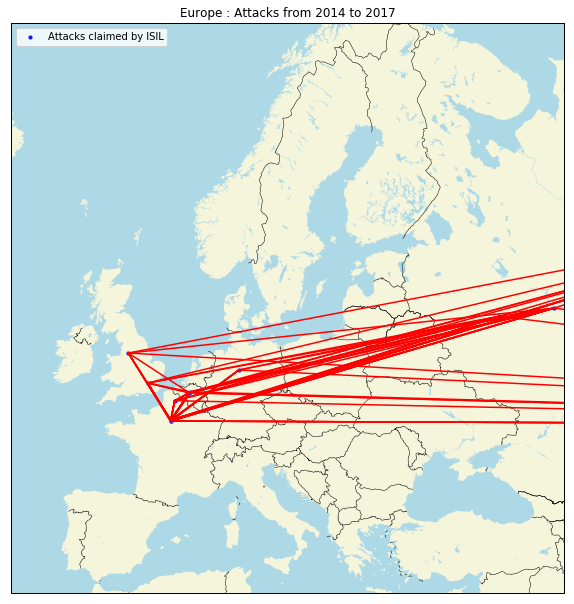

In [76]:
europe = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-15, 
        llcrnrlat=35,
        urcrnrlon=45,
        urcrnrlat=70,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

europe_dataframe = dataframe.loc[dataframe['region'] >= 8 ] #europe
europe_dataframe = europe_dataframe.loc[europe_dataframe['region'] <= 9 ]

europe_isil = europe_dataframe.loc[europe_dataframe["gname"] == "Islamic State of Iraq and the Levant (ISIL)"]
europe_isil.reset_index(inplace = True)

europe_isil_points = pd.Series(
                [Point(europe(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(europe_isil['longitude'], 
                                               europe_isil['latitude'])])

n_nodes = europe_isil['latitude'].size
adj_isil = np.zeros((n_nodes, n_nodes))

lons = europe_isil['longitude'].values
lats = europe_isil['latitude'].values

weapon_isil  = europe_isil['weaptype1'].values


x, y = europe(lons, lats)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.set_size_inches(18.5, 10.5)

dev = europe.scatter(
            [geom.x for geom in europe_isil_points],
            [geom.y for geom in europe_isil_points],
            20, marker='o', lw=.25,
            facecolor='blue', edgecolor='w', label='Attacks claimed by ISIL',
            alpha=0.9,antialiased=True,
            zorder=2)

# To determine if two nodes are connected, we compute a threshold by looking at their similarities with respect to specific 
# features, thus allowing to compute the probability for an edge to be generated

n_edges = 0

for index, rows in europe_isil.iterrows():
    for index2, rows2 in europe_isil.iterrows():
        if (index != index2):
            threshold = 0
            if (rows['targtype1_txt'] == rows2['targtype1_txt']):
                threshold = threshold + 0.3
            if (rows['gname'] == rows2['gname']):
                threshold = threshold + 0.25
            if (rows['attacktype1_txt'] == rows2['attacktype1_txt']):
                threshold = threshold + 0.15
            if (rows['natlty1'] == rows2['natlty1']):
                threshold = threshold + 0.1
            if (rows['suicide'] == rows2['suicide']):
                threshold = threshold + 0.1
            if (rows['weaptype1'] == rows2['weaptype1']):
                threshold = threshold + 0.05
            if (rows['country'] == rows2['country']):
                threshold = threshold + 0.05

            r = random.uniform(0, 1)
            if (r <= threshold and adj_isil[index, index2] == 0):
                n_edges = n_edges + 1
                adj_isil[index, index2] = 1
                adj_isil[index2, index] = 1
                lons = [rows['longitude'], rows2['longitude']]
                lats = [rows['latitude'], rows2['latitude']]
                x, y = europe(lons, lats)
                europe.plot(x, y, marker=None,color='r')

print("N_edges: ", n_edges)
print("N_nodes: ", n_nodes)


europe.fillcontinents(color='beige',lake_color='lightblue');
europe.drawcountries();
europe.drawmapboundary(fill_color='lightblue');
plt.title('Europe : Attacks from 2014 to 2017')
plt.legend()

In [73]:
europe_isil.reset_index(inplace = True)
for index, rows in europe_isil.iterrows():
    print(index)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
